<font size ="4">**Importing all the libraries**</font>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import string
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
import os
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import neighbors , metrics , svm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<font size ="4">**Downloading the dataset and extracting it to the appropriate data directory.**</font>

In [ ]:
data_directory = 'data/'
if not os.path.exists(data_directory):
    !mkdir data/
    !wget https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip --directory-prefix=data/
    !unzip data/News-_dataset.zip -d data/

--2023-06-05 13:19:19--  https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip
Resolving onlineacademiccommunity.uvic.ca (onlineacademiccommunity.uvic.ca)... 142.104.197.46
Connecting to onlineacademiccommunity.uvic.ca (onlineacademiccommunity.uvic.ca)|142.104.197.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43106824 (41M) [application/zip]
Saving to: ‘data/News-_dataset.zip’

News-_dataset.zip   100%[===================>]  41.11M  1.83MB/s    in 24s     

2023-06-05 13:19:44 (1.73 MB/s) - ‘data/News-_dataset.zip’ saved [43106824/43106824]

Archive:  data/News-_dataset.zip
  inflating: data/Fake.csv           
  inflating: data/True.csv           


<font size="4">**Read the data csv file**</font>

In [ ]:
fake_data = pd.read_csv('data/Fake.csv')
true_data = pd.read_csv('data/True.csv')

Assigning Classes to the Dataset

In [ ]:
true_data["label"] = 1
fake_data["label"] = 0

Merging Both the Dataset

In [ ]:
data = pd.concat([true_data, fake_data], axis=0)

Visualization of the text data based on subject column

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

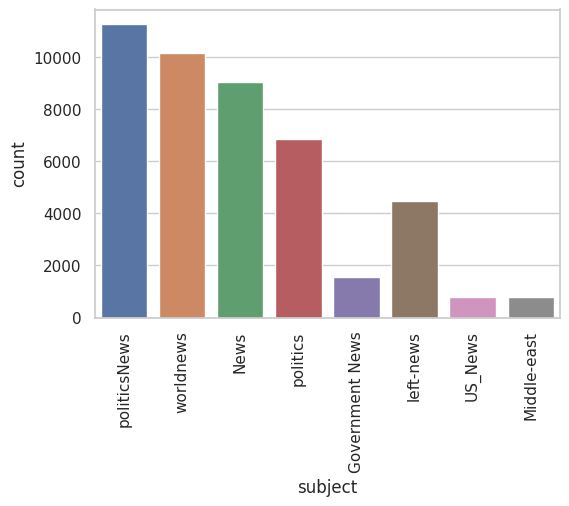

In [ ]:
plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

<font size="4">**Data preprocessing**</font>

In [ ]:
data['text'] = data['title'] +' '+data['text']
# Either you could data.drop["column names"] or del data["column names"]
del data['title']
del data['subject']
del data['date']

As the title, author column will not going to be helpful in identification of the news. So, we can drop these column.

In [ ]:
data.shape

(44898, 2)

Check if there is any null value (If so, then we will drop those rows)

In [ ]:
data.isnull().sum() # get the count of missing/NULL values for each column. if present remove missing values

text     0
label    0
dtype: int64

 Now we have to shuffle the dataset to prevent the model to get bias

In [ ]:
#Shuffling the data by sampling it randomly, then resetting the index and dropping the previous index column
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,text,label
0,Factbox: Trump on Twitter (July 28) - Obamacar...,1
1,Coretta Scott King’s Daughter Speaks Up And A...,0
2,SORRY NANCY! Here’s PROOF Democrats Have NOTHI...,0
3,WATCH: Fox News Host Smacks Down Trump Suppor...,0
4,Target Just Made A Major Move That’s Going To...,0


Now Let’s explore the unique values in the each category using below code.

<Axes: xlabel='label', ylabel='count'>

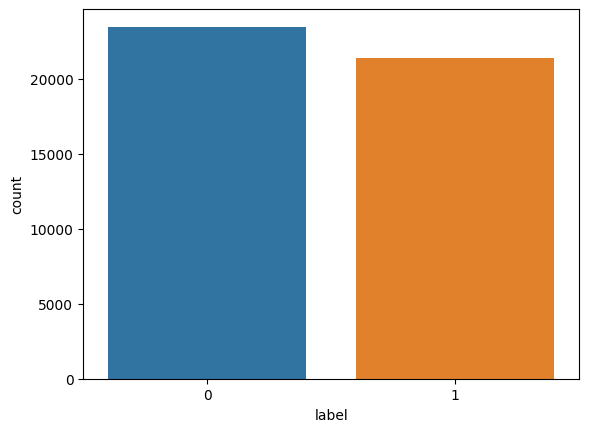

In [ ]:
sns.countplot(data=data,
              x='label',
              order=data['label'].value_counts().index)

In [ ]:
data['text']

0        Factbox: Trump on Twitter (July 28) - Obamacar...
1         Coretta Scott King’s Daughter Speaks Up And A...
2        SORRY NANCY! Here’s PROOF Democrats Have NOTHI...
3         WATCH: Fox News Host Smacks Down Trump Suppor...
4         Target Just Made A Major Move That’s Going To...
                               ...                        
44893    Factbox: Trump to meet with Oklahoma governor,...
44894    REMEMBER 24/7 Media Coverage Of Bush’s “Hurric...
44895    12 MUSLIM MIGRANTS GANG RAPE 13 YR OLD GIRL…Mu...
44896    LAUGHABLE! HILLARY DEFENDS Maxine “James Brown...
44897    U.S. senator raises questions about hospital o...
Name: text, Length: 44898, dtype: object

<font size="4">**Data Cleaning**</font>

Once we have all the required modules, we can create a function name preprocess text. This function will preprocess all the data given as input.

In [ ]:
def preprocess_text(text):

  text = text.lower()
  text = re.sub('\[.*?\]' , '' , text)
  text = re.sub('\\W' , ' ' ,text)
  text = re.sub('http?://\S+|www\.\S+' , '' , text)
  text = re.sub('<.*?>+' , '' , text)
  text = re.sub('\n' , '' , text)
  text = re.sub('\w*\d\w*' , '' , text)
  
  return text

data['text'] = data['text'].apply(preprocess_text)
data.head(20)

,text,label
0,factbox trump on twitter july obamacare ...,1
1,coretta scott king s daughter speaks up and a...,0
2,sorry nancy here s proof democrats have nothi...,0
3,watch fox news host smacks down trump suppor...,0
4,target just made a major move that s going to...,0
5,mexico s meade to seek nomination of ruling pr...,1
6,syrian muslim immigrant hairdresser slits fema...,0
7,trump convention delegate just indicted on se...,0
8,congressman wants homeland security to address...,1
9,marcobot malfunction new data shows rubio s ...,0


<font size="4">**Converting text into Vectors**</font>

In [ ]:
#TODO: explore different vectorization available with sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()
x , y = data['text'] , data['label']
x = vector.fit_transform(x)

x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25)

print(x)




  (0, 31050)	1
  (0, 96564)	2
  (0, 66889)	1
  (0, 97365)	2
  (0, 48322)	1
  (0, 66013)	2
  (0, 78495)	3
  (0, 40145)	2
  (0, 93690)	7
  (0, 33408)	1
  (0, 89251)	2
  (0, 102702)	1
  (0, 72582)	1
  (0, 94966)	3
  (0, 100467)	1
  (0, 728)	1
  (0, 66422)	2
  (0, 73286)	1
  (0, 25974)	1
  (0, 76563)	2
  (0, 3619)	2
  (0, 72730)	1
  (0, 67128)	1
  (0, 30708)	1
  (0, 4829)	2
  :	:
  (44897, 69416)	2
  (44897, 74016)	2
  (44897, 45472)	1
  (44897, 37601)	4
  (44897, 3209)	1
  (44897, 67111)	5
  (44897, 14537)	1
  (44897, 963)	1
  (44897, 58499)	1
  (44897, 65760)	1
  (44897, 75264)	1
  (44897, 77723)	1
  (44897, 57717)	1
  (44897, 40140)	1
  (44897, 88968)	1
  (44897, 97020)	1
  (44897, 70219)	1
  (44897, 22950)	1
  (44897, 8448)	1
  (44897, 99216)	1
  (44897, 98848)	1
  (44897, 42106)	1
  (44897, 739)	1
  (44897, 97785)	9
  (44897, 13202)	1


<font size="4">**Model training, Evaluation, and Prediction**</font>

In [ ]:
LR = LogisticRegression()
LR.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict = LR.predict(x_test)
print(predict)
LR.score(x_test , y_test) 

[1 0 1 ... 1 1 0]


0.9966146993318485

In [ ]:
LR.score(x_test , y_test)
print(classification_report(y_test ,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5748
           1       1.00      1.00      1.00      5477

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [ ]:
# Display the Confusion matrix of Results from your classification algorithm